In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100   # mol
R = 8.314 # (N*m)/(mol*K)
T = 300   # K    
# P       # N/m^2
# V       # m^3

In [3]:
def vol_pres (X):
    return n*R*T/X

vol_pres(1000)


def get_data_PV(nb_train_data, nb_test_data, mean_epsilon0, std_epsilon0, mean_epsilon1, std_epsilon1, random_seed):
    
    np.random.seed(random_seed)

    epsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_train_data))
    testEpsilon0 = np.random.normal(mean_epsilon0, std_epsilon0, (nb_test_data)) 
    
    epsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_train_data))
    testEpsilon1 = np.random.normal(mean_epsilon1, std_epsilon1, (nb_test_data))

    V = np.random.uniform(0,10,(nb_train_data))
    testV = np.random.normal(0, 10, (nb_test_data))

    Vtilde = V+epsilon0
    testVtilde = testV+testEpsilon0

    P = vol_pres(V)
    testP = vol_pres(testV)

    Ptilde = P+epsilon1
    testPtilde = testP+testEpsilon1
    
    return {"P":P, "V":V, "testP":testP, "testV":testV, "Ptilde":Ptilde, "Vtilde":Vtilde, "testPtilde":testPtilde, "testVtilde":testVtilde} 

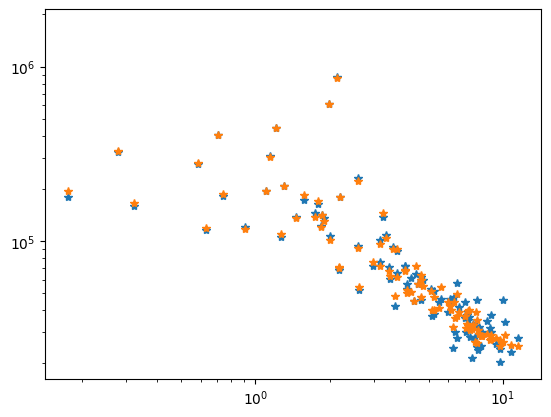

In [4]:
sol = get_data_PV(100, 100, 0, 1, 0, 5000,42)

plt.plot(sol["Vtilde"], sol["Ptilde"], "*")
plt.yscale("log")
plt.xscale("log")
plt.plot(sol["Vtilde"], sol["P"], "*")
plt.yscale("log")
plt.xscale("log")


Training with GD optimizer:
Epoch 0, Loss: 0.1603, Validation Loss: 0.3394
Epoch 1, Loss: 0.1603, Validation Loss: 0.3393
Epoch 2, Loss: 0.1602, Validation Loss: 0.3393
Epoch 3, Loss: 0.1602, Validation Loss: 0.3393
Epoch 4, Loss: 0.1602, Validation Loss: 0.3393
Epoch 5, Loss: 0.1602, Validation Loss: 0.3393
Epoch 6, Loss: 0.1602, Validation Loss: 0.3393
Epoch 7, Loss: 0.1602, Validation Loss: 0.3393
Epoch 8, Loss: 0.1601, Validation Loss: 0.3393
Epoch 9, Loss: 0.1601, Validation Loss: 0.3393
Epoch 10, Loss: 0.1601, Validation Loss: 0.3393
Epoch 11, Loss: 0.1601, Validation Loss: 0.3393
Epoch 12, Loss: 0.1601, Validation Loss: 0.3393
Epoch 13, Loss: 0.1601, Validation Loss: 0.3393
Epoch 14, Loss: 0.1601, Validation Loss: 0.3393
Epoch 15, Loss: 0.1601, Validation Loss: 0.3393
Epoch 16, Loss: 0.1600, Validation Loss: 0.3393
Epoch 17, Loss: 0.1600, Validation Loss: 0.3393
Epoch 18, Loss: 0.1600, Validation Loss: 0.3393
Epoch 19, Loss: 0.1600, Validation Loss: 0.3393
Epoch 20, Loss: 0.160

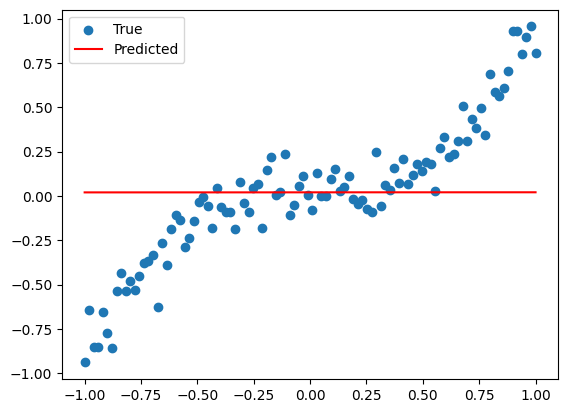


Training with NAG optimizer:
Epoch 0, Loss: 0.1601, Validation Loss: 0.3389
Epoch 1, Loss: 0.1600, Validation Loss: 0.3388
Epoch 2, Loss: 0.1599, Validation Loss: 0.3388
Epoch 3, Loss: 0.1598, Validation Loss: 0.3387
Epoch 4, Loss: 0.1596, Validation Loss: 0.3387
Epoch 5, Loss: 0.1595, Validation Loss: 0.3387
Epoch 6, Loss: 0.1594, Validation Loss: 0.3387
Epoch 7, Loss: 0.1593, Validation Loss: 0.3388
Epoch 8, Loss: 0.1593, Validation Loss: 0.3388
Epoch 9, Loss: 0.1593, Validation Loss: 0.3388
Epoch 10, Loss: 0.1593, Validation Loss: 0.3389
Epoch 11, Loss: 0.1593, Validation Loss: 0.3389
Epoch 12, Loss: 0.1593, Validation Loss: 0.3389
Epoch 13, Loss: 0.1593, Validation Loss: 0.3388
Epoch 14, Loss: 0.1592, Validation Loss: 0.3388
Epoch 15, Loss: 0.1592, Validation Loss: 0.3387
Epoch 16, Loss: 0.1591, Validation Loss: 0.3385
Epoch 17, Loss: 0.1591, Validation Loss: 0.3384
Epoch 18, Loss: 0.1590, Validation Loss: 0.3383
Epoch 19, Loss: 0.1590, Validation Loss: 0.3381
Epoch 20, Loss: 0.15

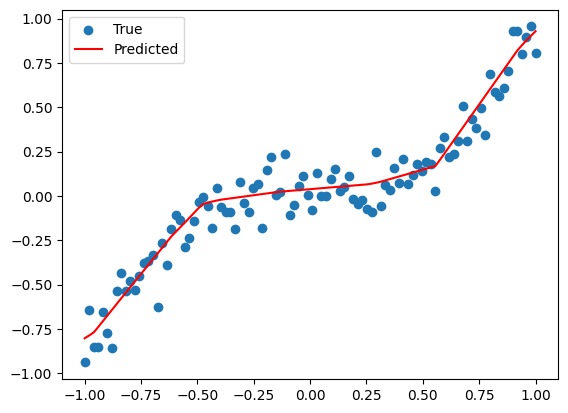


Training with ADAM optimizer:
Epoch 0, Loss: 0.1604, Validation Loss: 0.3391
Epoch 1, Loss: 0.1596, Validation Loss: 0.3387
Epoch 2, Loss: 0.1591, Validation Loss: 0.3366
Epoch 3, Loss: 0.1577, Validation Loss: 0.3321
Epoch 4, Loss: 0.1550, Validation Loss: 0.3252
Epoch 5, Loss: 0.1507, Validation Loss: 0.3128
Epoch 6, Loss: 0.1429, Validation Loss: 0.2938
Epoch 7, Loss: 0.1311, Validation Loss: 0.2689
Epoch 8, Loss: 0.1160, Validation Loss: 0.2387
Epoch 9, Loss: 0.1001, Validation Loss: 0.2127
Epoch 10, Loss: 0.0924, Validation Loss: 0.1991
Epoch 11, Loss: 0.0915, Validation Loss: 0.1880
Epoch 12, Loss: 0.0803, Validation Loss: 0.1862
Epoch 13, Loss: 0.0734, Validation Loss: 0.1889
Epoch 14, Loss: 0.0741, Validation Loss: 0.1809
Epoch 15, Loss: 0.0711, Validation Loss: 0.1625
Epoch 16, Loss: 0.0633, Validation Loss: 0.1490
Epoch 17, Loss: 0.0613, Validation Loss: 0.1444
Epoch 18, Loss: 0.0632, Validation Loss: 0.1378
Epoch 19, Loss: 0.0580, Validation Loss: 0.1415
Epoch 20, Loss: 0.0

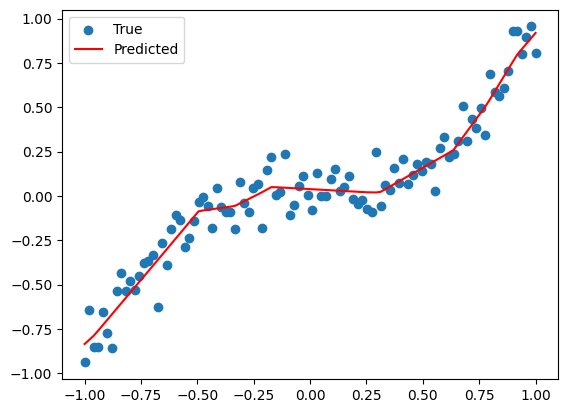

In [72]:
import numpy as np

# Activation function (ReLU) and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Mean Squared Error and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / len(y_true)

# Neural Network with multiple optimizers and early stopping
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, nb_hidden, optimizer="gd", lr=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.nb_hidden = nb_hidden
        self.lr = lr
        self.momentum = momentum
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.optimizer = optimizer
        self.t = 0  # For Adam updates
        
        # Initialize weights and biases
        self.weights = [np.random.randn(input_dim, hidden_dim) * 0.1]
        self.biases = [np.zeros((1, hidden_dim))]
        
        for _ in range(nb_hidden - 1):
            self.weights.append(np.random.randn(hidden_dim, hidden_dim) * 0.1)
            self.biases.append(np.zeros((1, hidden_dim)))
        
        self.weights.append(np.random.randn(hidden_dim, output_dim) * 0.1)
        self.biases.append(np.zeros((1, output_dim)))
        
        # Initialize momentum/Adam parameters
        if optimizer in ["nag", "adam"]:
            self.v_weights = [np.zeros_like(w) for w in self.weights]
            self.v_biases = [np.zeros_like(b) for b in self.biases]
        if optimizer == "adam":
            self.m_weights = [np.zeros_like(w) for w in self.weights]
            self.m_biases = [np.zeros_like(b) for b in self.biases]
    
    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        
        for i in range(len(self.weights)):
            Z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(Z)
            if i == len(self.weights) - 1:
                self.activations.append(Z)  # No activation for the output layer
            else:
                self.activations.append(relu(Z))
        
        return self.activations[-1]
    
    def backward(self, X, y, y_pred):
        dL_dZ = mse_derivative(y, y_pred)
        gradients_weights = []
        gradients_biases = []
        
        for i in reversed(range(len(self.weights))):
            dL_dW = np.dot(self.activations[i].T, dL_dZ)
            dL_db = np.sum(dL_dZ, axis=0, keepdims=True)
            gradients_weights.insert(0, dL_dW)
            gradients_biases.insert(0, dL_db)
            
            if i > 0:
                dL_dA_prev = np.dot(dL_dZ, self.weights[i].T)
                dL_dZ = dL_dA_prev * relu_derivative(self.z_values[i - 1])
        
        return gradients_weights, gradients_biases
    
    def update_parameters(self, gradients_weights, gradients_biases):
        if self.optimizer == "gd":
            for i in range(len(self.weights)):
                self.weights[i] -= self.lr * gradients_weights[i]
                self.biases[i] -= self.lr * gradients_biases[i]
        elif self.optimizer == "nag":
            for i in range(len(self.weights)):
                look_ahead_weights = self.weights[i] - self.momentum * self.v_weights[i]
                look_ahead_biases = self.biases[i] - self.momentum * self.v_biases[i]
                
                self.v_weights[i] = self.momentum * self.v_weights[i] + self.lr * gradients_weights[i]
                self.v_biases[i] = self.momentum * self.v_biases[i] + self.lr * gradients_biases[i]
                
                self.weights[i] = look_ahead_weights - self.v_weights[i]
                self.biases[i] = look_ahead_biases - self.v_biases[i]
        elif self.optimizer == "adam":
            self.t += 1
            for i in range(len(self.weights)):
                self.m_weights[i] = self.beta1 * self.m_weights[i] + (1 - self.beta1) * gradients_weights[i]
                self.v_weights[i] = self.beta2 * self.v_weights[i] + (1 - self.beta2) * (gradients_weights[i] ** 2)
                m_hat = self.m_weights[i] / (1 - self.beta1 ** self.t)
                v_hat = self.v_weights[i] / (1 - self.beta2 ** self.t)
                self.weights[i] -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
                
                self.m_biases[i] = self.beta1 * self.m_biases[i] + (1 - self.beta1) * gradients_biases[i]
                self.v_biases[i] = self.beta2 * self.v_biases[i] + (1 - self.beta2) * (gradients_biases[i] ** 2)
                m_hat_b = self.m_biases[i] / (1 - self.beta1 ** self.t)
                v_hat_b = self.v_biases[i] / (1 - self.beta2 ** self.t)
                self.biases[i] -= self.lr * m_hat_b / (np.sqrt(v_hat_b) + self.epsilon)
    
    def train(self, X, y, X_val, y_val, epochs, patience=10):
        best_loss = float("inf")
        patience_counter = 0
        
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = mse(y, y_pred)
            gradients_weights, gradients_biases = self.backward(X, y, y_pred)
            self.update_parameters(gradients_weights, gradients_biases)
            
            val_loss = mse(y_val, self.forward(X_val))
            print(f"Epoch {epoch}, Loss: {loss:.4f}, Validation Loss: {val_loss:.4f}")
            
            # Early stopping check
            if val_loss < best_loss:
                best_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print("Early stopping triggered")
                    break
    
    def predict(self, X):
        return self.forward(X)

# Example usage
if __name__ == "__main__":
    # Generate training and validation data
    X = np.linspace(-1, 1, 100).reshape(-1, 1)
    y = X**3 + np.random.normal(0, 0.1, X.shape)
    X_val = np.linspace(-1.1, 1.1, 20).reshape(-1, 1)
    y_val = X_val**3 + np.random.normal(0, 0.1, X_val.shape)
    
    # Train the network using different optimizers
    for optimizer in ["gd", "nag", "adam"]:
        print(f"\nTraining with {optimizer.upper()} optimizer:")
        nn = NeuralNetwork(input_dim=1, hidden_dim=20, output_dim=1, nb_hidden=5, optimizer=optimizer, lr=0.01)
        nn.train(X, y, X_val, y_val, epochs=100000, patience=200)
    
        # Predict
        y_pred = nn.predict(X)
        
        # Plot the results (requires matplotlib)
        try:
            import matplotlib.pyplot as plt
            plt.scatter(X, y, label="True")
            plt.plot(X, y_pred, color="red", label="Predicted")
            plt.legend()
            plt.show()
        except ImportError:
            print("Matplotlib is not installed. Please install it to visualize the results.")
